<a href="https://colab.research.google.com/github/eziong/MachineLearning02/blob/master/Assignment05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

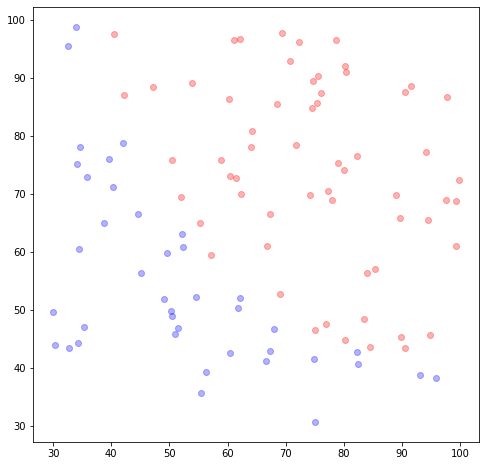

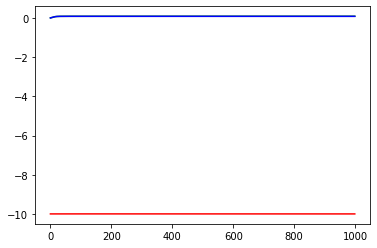

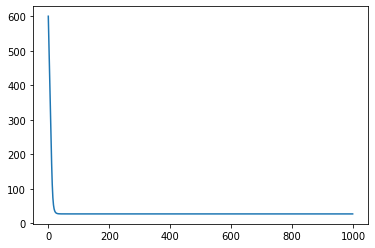

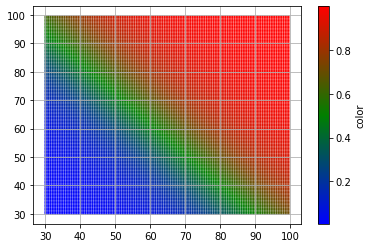

In [190]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

data = np.genfromtxt('data.txt', delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]

x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()


def z(theta,X):
  res = []
  X_t = np.transpose(X)
  for x in X_t:
    zi = x[0] * theta[0] + x[1] * theta[1] + x[2] * theta[2]
    res.append(zi)
  return res

def sigma(z):
  return 1/(1+np.exp(-z))

def J(l,z):
  sum = 0
  for i in range(len(z)):
    sum = sum + l[i]*(-np.log(sigma(z[i])))+(1-l[i])*(-np.log(1-sigma(z[i])))
  return sum

def J_prime(z,l,xi):
  return (sigma(z)-l)*xi

def w(z,l,xi):
  return J_prime(z,l,xi)

learning_rate = 1e-6

theta_0 = -10 # -247.2에서 수렴
theta_1 = 0
theta_2 = 0

arr_t0 = []
arr_t1 = []
arr_t2 = []

arr_J = []

X = [np.ones(len(x)),x,y]

for _ in range(1000):
  theta = [theta_0,theta_1,theta_2]
  zet = z(theta,X)
  l = label
  arr_t0.append(theta_0)
  arr_t1.append(theta_1)
  arr_t2.append(theta_2)
  J_0 = 0
  J_1 = 0
  J_2 = 0
  for i in range(len(zet)):
    theta_0 = theta_0 - learning_rate*w(zet[i],l[i],X[0][i])
    theta_1 = theta_1 - learning_rate*w(zet[i],l[i],X[1][i])
    theta_2 = theta_2 - learning_rate*w(zet[i],l[i],X[2][i])
  arr_J.append(J(l,zet))

a = np.arange(30,100,0.5)
b = np.arange(30,100,0.5)
cmap = LinearSegmentedColormap.from_list('mycmap', ['blue', 'green', 'red'])
aa, bb = np.meshgrid(a,b)
#plt.colormap(a,b,sigma(z([theta0,theta1,theta2],[1,a,b])))
C = []
for aaa,bbb in zip(aa,bb): #([theta_0,theta_1,theta_2],[np.ones(len(a)),a,b]):
  for i in range(len(z([theta_0,theta_1,theta_2],[[1],[aaa],[bbb]]))):
    add = sigma(z([theta_0,theta_1,theta_2],[[1],[aaa],[bbb]])[i])
    C.append(add)

plt.plot(arr_t0,color='r')
plt.plot(arr_t1,color='g')
plt.plot(arr_t2,color='b')
plt.show()

plt.plot(arr_J)
plt.show()

plt.scatter(aa, bb, c=C, s= 0.5,cmap=cmap)
plt.colorbar(label='color')
plt.grid()
plt.show()